

```
Name: Sudarsun S
RegNo: 20BCE1699
Machine Learning Embedded Lab
Topic: KNN Classification
```



In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
X = pd.read_csv("housing.csv")
display(X.head())

,longitude,latitude,House_Age,Rooms_total,bedrooms_total,population,households,income_median,house_value_median
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200


In [3]:
bin_edges = [0, 100000, 200000, 300000, 400000, 500000, float('inf')]
bin_labels = ['0-100k', '100k-200k', '200k-300k', '300k-400k', '400k-500k', '500k+']

X['house_value_category'] = pd.cut(X['house_value_median'], bins=bin_edges, labels=bin_labels)

X.drop('house_value_median', axis=1, inplace=True)

X.rename(columns={'house_value_category': 'house_value_median'}, inplace=True)

display(X)

,longitude,latitude,House_Age,Rooms_total,bedrooms_total,population,households,income_median,house_value_median
0,-122.23,37.88,41,880,129.0,322,126,8.3252,400k-500k
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,300k-400k
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,300k-400k
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,300k-400k
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,300k-400k
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,0-100k
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,0-100k
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,0-100k
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,0-100k


In [4]:
y = X[["house_value_median"]]
X.drop(columns=["house_value_median"], inplace=True)
display(X)
display(y)

,longitude,latitude,House_Age,Rooms_total,bedrooms_total,population,households,income_median
0,-122.23,37.88,41,880,129.0,322,126,8.3252
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014
2,-122.24,37.85,52,1467,190.0,496,177,7.2574
3,-122.25,37.85,52,1274,235.0,558,219,5.6431
4,-122.25,37.85,52,1627,280.0,565,259,3.8462
...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603
20636,-121.21,39.49,18,697,150.0,356,114,2.5568
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672


,house_value_median
0,400k-500k
1,300k-400k
2,300k-400k
3,300k-400k
4,300k-400k
...,...
20635,0-100k
20636,0-100k
20637,0-100k
20638,0-100k


In [6]:
summary_stats_X = X.describe()
display(summary_stats_X)

,longitude,latitude,House_Age,Rooms_total,bedrooms_total,population,households,income_median
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [8]:
print("Length of train frame (X_train):", len(X_train))
print("Length of train frame (Y_train):", len(Y_train))

print("Length of test frame (X_test):", len(X_test))
print("Length of test frame (Y_test):", len(Y_test))

Length of train frame (X_train): 15480
Length of train frame (Y_train): 15480
Length of test frame (X_test): 5160
Length of test frame (Y_test): 5160


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [10]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
summary_stats_X_train = X_train_scaled_df.describe()
display(summary_stats_X_train)

,longitude,latitude,House_Age,Rooms_total,bedrooms_total,population,households,income_median
count,1.548000e+04,1.548000e+04,1.548000e+04,1.548000e+04,1.548000e+04,1.548000e+04,1.548000e+04,1.548000e+04
mean,2.206676e-15,7.890329e-16,-1.232434e-16,-7.803118e-18,9.730947e-17,-8.996536e-17,4.268764e-17,2.074711e-16
std,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00
min,-2.380303e+00,-1.451215e+00,-2.188261e+00,-1.210637e+00,-1.278414e+00,-1.246395e+00,-1.304742e+00,-1.774632e+00
25%,-1.106817e+00,-7.998196e-01,-8.402236e-01,-5.463367e-01,-5.777726e-01,-5.588859e-01,-5.762069e-01,-6.888537e-01
50%,5.362306e-01,-6.451718e-01,3.203613e-02,-2.352607e-01,-2.428898e-01,-2.279278e-01,-2.354405e-01,-1.756629e-01
75%,7.859338e-01,9.716009e-01,6.664069e-01,2.389125e-01,2.582469e-01,2.620564e-01,2.776676e-01,4.644500e-01
max,2.633738e+00,2.953905e+00,1.855852e+00,1.680245e+01,1.402644e+01,2.997172e+01,1.457419e+01,5.842113e+00


In [11]:
nan_indices_train = np.isnan(X_train_scaled).any(axis=1)
nan_indices_test = np.isnan(X_test_scaled).any(axis=1)
X_train_cleaned = X_train_scaled[~nan_indices_train]
Y_train_cleaned = Y_train[~nan_indices_train]
X_test_cleaned = X_test_scaled[~nan_indices_test]
Y_test_cleaned = Y_test[~nan_indices_test]

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_cleaned, Y_train_cleaned)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [13]:
Y_pred = knn_model.predict(X_test_cleaned)
print(Y_pred)

['100k-200k' '100k-200k' '100k-200k' ... '100k-200k' '200k-300k'
 '300k-400k']


In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
accuracy = accuracy_score(Y_test_cleaned, Y_pred)
print("Accuracy:", accuracy)

precision = precision_score(Y_test_cleaned, Y_pred, average='weighted')
print("Precision:", precision)

recall = recall_score(Y_test_cleaned, Y_pred, average='weighted')
print("Recall:", recall)

f1 = f1_score(Y_test_cleaned, Y_pred, average='weighted')
print("F1-score:", f1)

classification_rep = classification_report(Y_test_cleaned, Y_pred)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.6153846153846154
Precision: 0.6023443686331278
Recall: 0.6153846153846154
F1-score: 0.6042187029651737
Classification Report:
              precision    recall  f1-score   support

      0-100k       0.72      0.71      0.72       882
   100k-200k       0.66      0.76      0.71      1992
   200k-300k       0.53      0.55      0.54      1165
   300k-400k       0.41      0.29      0.34       501
   400k-500k       0.32      0.14      0.20       187
       500k+       0.67      0.45      0.54       226

    accuracy                           0.62      4953
   macro avg       0.55      0.48      0.51      4953
weighted avg       0.60      0.62      0.60      4953



Confusion Matrix:

[[ 628  250    1    1    0    2]
 [ 215 1506  258   11    2    0]
 [  21  403  640   94    3    4]
 [   5   85  221  145   31   14]
 [   2   14   55   59   27   30]
 [   3   20   37   43   21  102]] 



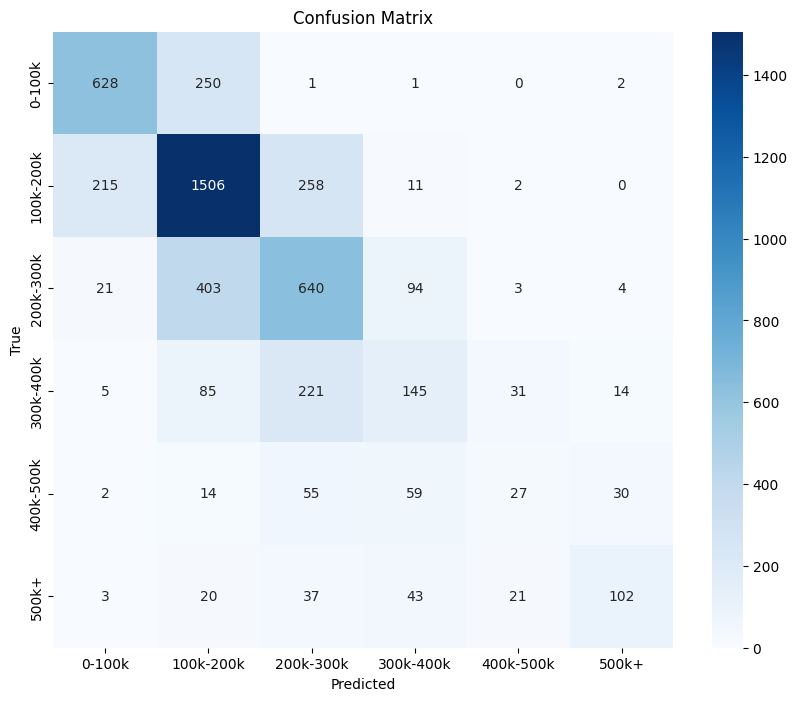

In [24]:
confusion = confusion_matrix(Y_test_cleaned, Y_pred)
print("Confusion Matrix:\n")
print(confusion,'\n')
plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [15]:
Y_pred_1d = Y_pred.reshape(-1)
predicted_df = pd.DataFrame({'Predicted_Y': Y_pred_1d})
predicted_stats = predicted_df.describe()
print(predicted_stats)

       Predicted_Y
count         4953
unique           6
top      100k-200k
freq          2278
